In [1]:
print("Ok")

Ok


In [2]:
import pygrib
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns

In [8]:
import xarray as xr
import glob

# List all your NetCDF files
files = sorted(glob.glob("data/climate/utci_mrt_variables/*/*.nc"))

# Open each file separately 
datasets = [xr.open_dataset(f) for f in files]

In [9]:
combined = xr.combine_by_coords(datasets, combine_attrs="override")
df = combined.to_dataframe()
df.head()

mrt        utci
time       lat   lon                           
2019-01-01 42.00 -88.25  274.641754  259.000153
                 -88.00  274.946381  258.146332
                 -87.75  275.416046  254.959167
           41.75 -88.25  275.086975  259.627472
                 -88.00  275.304626  260.209259

In [10]:
df.reset_index(inplace=True)
df['time'].unique()

<DatetimeArray>
['2019-01-01 00:00:00', '2019-01-01 01:00:00', '2019-01-01 02:00:00',
 '2019-01-01 03:00:00', '2019-01-01 04:00:00', '2019-01-01 05:00:00',
 '2019-01-01 06:00:00', '2019-01-01 07:00:00', '2019-01-01 08:00:00',
 '2019-01-01 09:00:00',
 ...
 '2024-12-05 14:00:00', '2024-12-05 15:00:00', '2024-12-05 16:00:00',
 '2024-12-05 17:00:00', '2024-12-05 18:00:00', '2024-12-05 19:00:00',
 '2024-12-05 20:00:00', '2024-12-05 21:00:00', '2024-12-05 22:00:00',
 '2024-12-05 23:00:00']
Length: 8640, dtype: datetime64[ns]

In [14]:
df.head(n=100)

,time,lat,lon,mrt,utci,date
0,2019-01-01 00:00:00,42.00,-88.25,274.641754,259.000153,2019-01-01
1,2019-01-01 00:00:00,42.00,-88.00,274.946381,258.146332,2019-01-01
2,2019-01-01 00:00:00,42.00,-87.75,275.416046,254.959167,2019-01-01
3,2019-01-01 00:00:00,41.75,-88.25,275.086975,259.627472,2019-01-01
4,2019-01-01 00:00:00,41.75,-88.00,275.304626,260.209259,2019-01-01
...,...,...,...,...,...,...
95,2019-01-01 10:00:00,41.75,-87.75,272.186279,258.855011,2019-01-01
96,2019-01-01 10:00:00,41.50,-88.25,272.245361,264.576904,2019-01-01
97,2019-01-01 10:00:00,41.50,-88.00,272.367065,265.073334,2019-01-01
98,2019-01-01 10:00:00,41.50,-87.75,272.544678,264.175323,2019-01-01


In [13]:
df['date'] = df['time'].dt.floor('d')
df.head()

,time,lat,lon,mrt,utci,date
0,2019-01-01,42.00,-88.25,274.641754,259.000153,2019-01-01
1,2019-01-01,42.00,-88.00,274.946381,258.146332,2019-01-01
2,2019-01-01,42.00,-87.75,275.416046,254.959167,2019-01-01
3,2019-01-01,41.75,-88.25,275.086975,259.627472,2019-01-01
4,2019-01-01,41.75,-88.00,275.304626,260.209259,2019-01-01


In [20]:
# Aggregate to daily data by date, lat, lon (mean of mrt and utci)
df_daily = df.groupby(['date']).agg({'mrt': 'mean', 'utci': 'mean'}).reset_index()
df_daily.head(n=10)

,date,mrt,utci
0,2019-01-01,274.270721,262.836792
1,2019-01-02,271.912872,264.246521
2,2019-01-03,275.356628,260.625031
3,2019-01-04,278.347931,266.398926
4,2019-01-05,278.968628,269.798920
5,2019-02-01,273.335815,257.770966
6,2019-02-02,274.829254,258.079712
7,2019-02-03,281.923035,267.840668
8,2019-02-04,281.936554,271.146210
9,2019-02-05,275.309448,262.055054


In [21]:
# Convert temperature from Kelvin to Fahrenheit
df_daily['mrt_F'] = (df_daily['mrt'] - 273.15) * 9/5 + 32
df_daily.head(n=10)

,date,mrt,utci,mrt_F
0,2019-01-01,274.270721,262.836792,34.017311
1,2019-01-02,271.912872,264.246521,29.773182
2,2019-01-03,275.356628,260.625031,35.971943
3,2019-01-04,278.347931,266.398926,41.356285
4,2019-01-05,278.968628,269.798920,42.473541
5,2019-02-01,273.335815,257.770966,32.334480
6,2019-02-02,274.829254,258.079712,35.022667
7,2019-02-03,281.923035,267.840668,47.791473
8,2019-02-04,281.936554,271.146210,47.815807
9,2019-02-05,275.309448,262.055054,35.887016


## ED Data

In [18]:
df_ed_cases = pd.read_parquet("data/health/weather_related_er_visits_daily.parquet", engine='pyarrow')
df_ed_cases.head()

,Date,ColdPct,ColdCount,HeatPct,HeatCount,TotalED
0,2010-01-01,NaN,NaN,NaN,NaN,3438
1,2010-01-02,NaN,NaN,0.0,0.0,3649
2,2010-01-03,NaN,NaN,0.0,0.0,3408
3,2010-01-04,NaN,NaN,0.0,0.0,3968
4,2010-01-05,NaN,NaN,0.0,0.0,3563


In [27]:
df_ed_cases.isnull().sum()

Date            0
ColdPct      3150
ColdCount    3150
HeatPct      2278
HeatCount    2278
TotalED         0
dtype: int64

In [22]:
merged_df = pd.merge(df_daily, df_ed_cases, left_on='date', right_on='Date', how='left')

merged_df = merged_df.drop(columns=['Date'])
merged_df.head()

,date,mrt,utci,mrt_F,ColdPct,ColdCount,HeatPct,HeatCount,TotalED
0,2019-01-01,274.270721,262.836792,34.017311,0.100100,15.0,0.0,0.0,14985.0
1,2019-01-02,271.912872,264.246521,29.773182,0.103074,17.0,NaN,NaN,16493.0
2,2019-01-03,275.356628,260.625031,35.971943,0.069414,11.0,0.0,0.0,15847.0
3,2019-01-04,278.347931,266.398926,41.356285,0.076302,12.0,NaN,NaN,15727.0
4,2019-01-05,278.968628,269.798920,42.473541,NaN,NaN,0.0,0.0,14577.0


In [28]:
merged_df.count()

date         360
mrt          360
utci         360
mrt_F        360
ColdPct      178
ColdCount    178
HeatPct      172
HeatCount    172
TotalED      345
dtype: int64

In [23]:
# Select relevant columns
correlation_df = merged_df[['mrt_F', 'utci', 'ColdCount', 'HeatCount', 'TotalED']]

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Show correlations with TotalED
cold_corr = correlation_matrix['TotalED'].sort_values(ascending=False)

print("Correlation of TotalED with other variables:\n")
print(cold_corr)

Correlation of TotalED with other variables:

TotalED      1.000000
HeatCount    0.066336
utci         0.063296
mrt_F        0.029738
ColdCount   -0.199731
Name: TotalED, dtype: float64


In [24]:
# Show correlations with ColdCount
cold_corr = correlation_matrix['ColdCount'].sort_values(ascending=False)

print("Correlation of ColdCount with other variables:\n")
print(cold_corr)

Correlation of ColdCount with other variables:

ColdCount    1.000000
TotalED     -0.199731
HeatCount   -0.231138
mrt_F       -0.476593
utci        -0.576802
Name: ColdCount, dtype: float64


In [25]:
# Show correlations with HeatCount
cold_corr = correlation_matrix['HeatCount'].sort_values(ascending=False)

print("Correlation of HeatCount with other variables:\n")
print(cold_corr)

Correlation of HeatCount with other variables:

HeatCount    1.000000
mrt_F        0.721622
utci         0.700539
TotalED      0.066336
ColdCount   -0.231138
Name: HeatCount, dtype: float64


## Visualizations

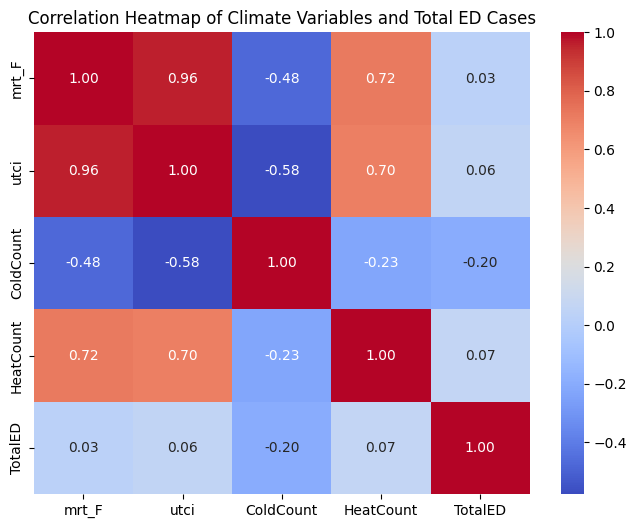

In [26]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
corr = merged_df[['mrt_F', 'utci', 'ColdCount', 'HeatCount', 'TotalED']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Climate Variables and Total ED Cases')
plt.show()